In [1]:
import numpy as np
import pandas as pd 

In [2]:
df=pd.read_csv('dataset/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### Since there are only 1372 entries we are keeping 90% dataset for training and using only 10% for testing

In [5]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df['class'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))

X_train Shape: (1234, 4)
X_test Shape: (138, 4)


In [6]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
print(classifier.score(X_test,y_test))
y_pred=classifier.predict(X_test)

0.9927536231884058


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        77
           1       0.98      1.00      0.99        61

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138



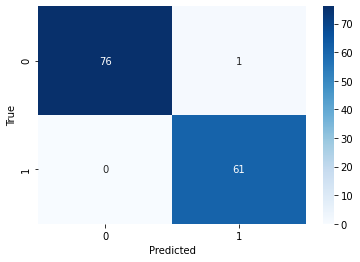

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('True');

In [9]:
### create pickle file
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()

In [10]:
classifier.predict([[2,3,4,1]])

array([0])